In [1]:
from IPython.display import display, Math, Latex


display(Math(r'Call \space \Delta = e^{-qt} * N(d_1)'))
display(Math(r'Put \space \Delta = e^{-qt} * (N(d_1)-1)'))
display(Math(r'$Call \space and \space Put \space \Gamma = \frac{e^{-qt}} {S_0 \sigma \sqrt{t}} \
                       * \frac{1}{\sqrt{2 \pi}} \
                     * e^\frac{d_1^2}{2}$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
'''Defines the function for the rate of change of the price of a Europena option for a change 
in the price of underlier (Delta) using the mathematical formulae above'''

import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy import stats

def Delta_value(S, K, T, r, vol, pc='put'):
    ''' Analytical European call option value for Black-Scholes-Merton (1973).
    S0: Underlying price
    K:  option strike price
    T:  expiration - time-to-maturity in fraction of year
    r:  constant short interest rate
    vol:volatility of underlying asset

    Returns :European put/call option present value
    '''
    r = 0.05 # constant short rate
    vol = 0.25 # constant volatility factor of diffusion
    
    
    #Here are the expiration payoff equations for call and put options
    #call = np.maximum(S - K, 0)
    #put  = np.maximum(K - S, 0)
    
    d1 = (math.log(S/K) + (r+0.5*vol**2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T) 

    if pc.lower()=='call':
        return( math.exp(-r*T)*stats.norm.cdf(d1))
    else:
        return(math.exp(-r*T)*(stats.norm.cdf(d1)-1)) 



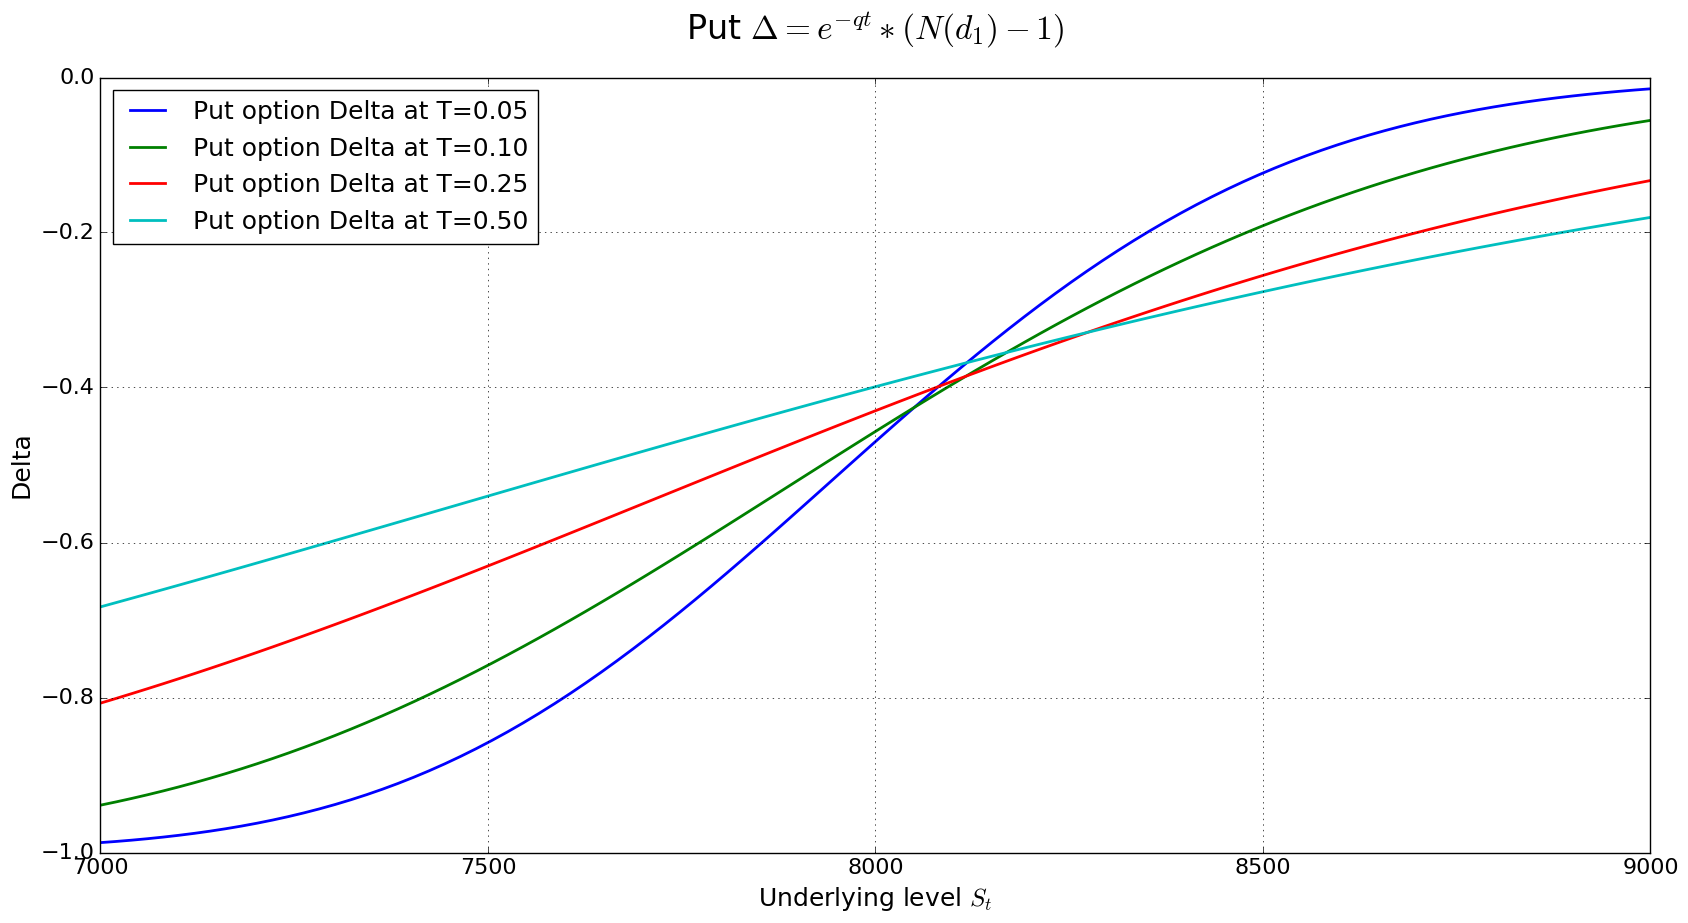

In [3]:
#Plots the function for a put option for different values of time to expiry (T)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math, Latex
from numpy import vectorize
#from IPython.display import display Math, Latex
#from IPython.display import display, Image
plt.close()
S = np.linspace(7000, 9000, 100)
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion
#vectorise Delta_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vDValue=vectorize(Delta_value)

plt.figure(figsize=(20,10))
plt.grid(True)
pvd=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvd.append(vDValue(S, 8000, T, r, .15, pc="put"))
    plt.plot(S, pvd[i], lw=2, label="Put option Delta at T={exp:1.2f}".format(exp=Ts[i]))

plt.title(r'Put $\Delta = e^{-qt} * (N(d_1)-1)$', fontsize = 24, y=1.04)
plt.xlabel('Underlying level $S_t$', fontsize = 18)
plt.ylabel('Delta', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()

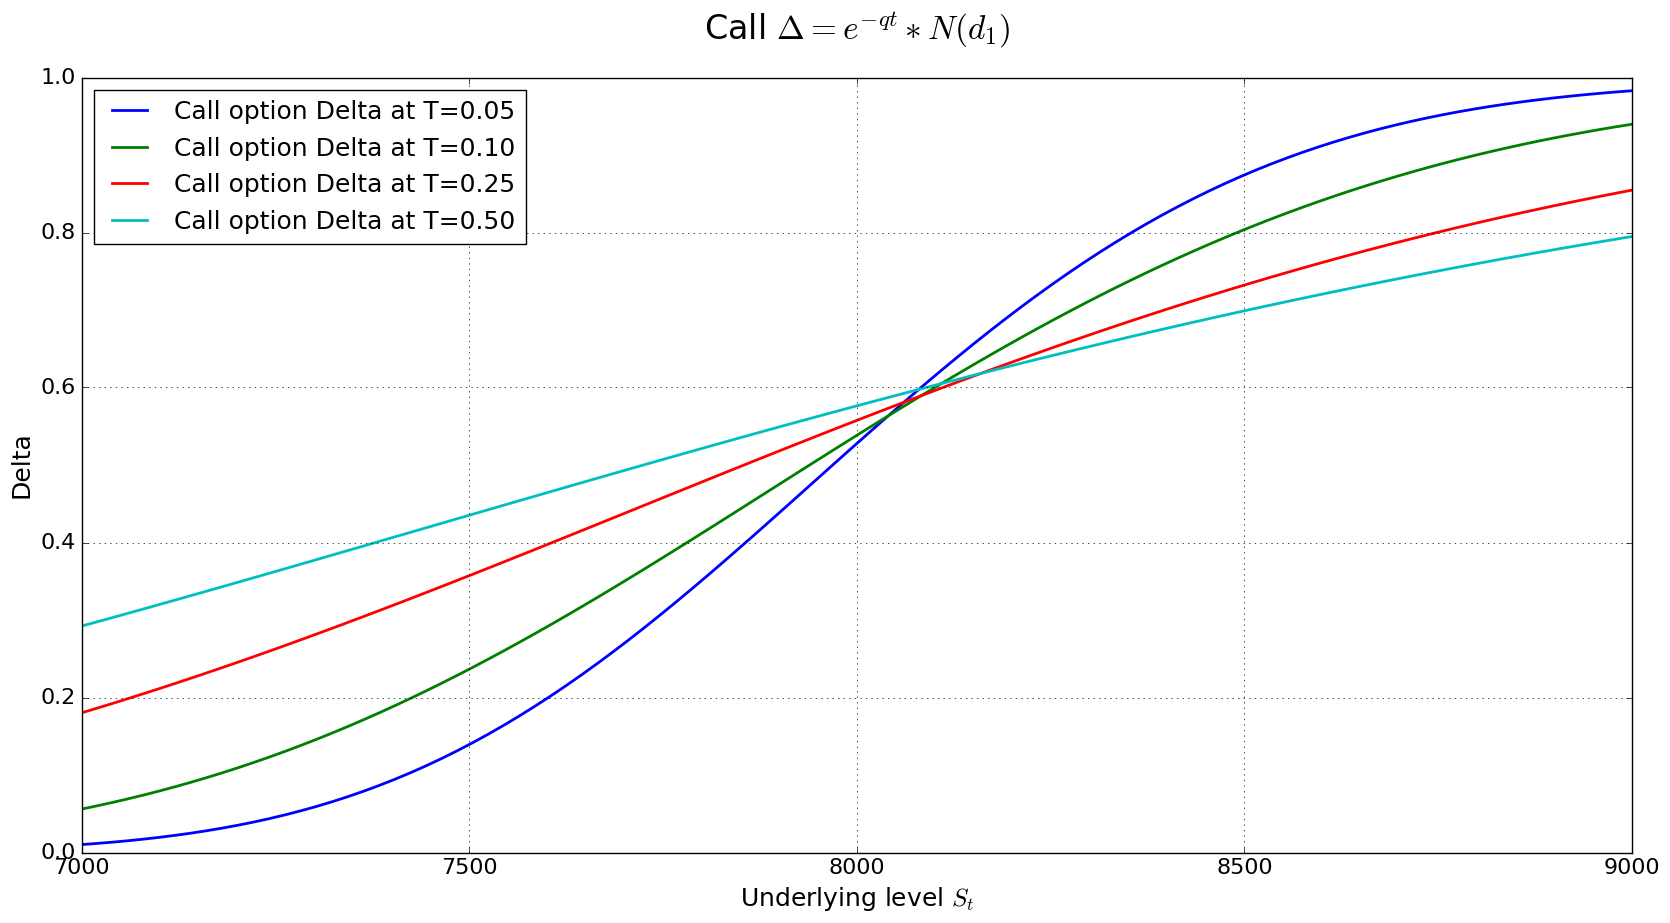

In [4]:
#Plots the function for a call option for different values of time to expiry (T)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import vectorize
from IPython.display import display, Math, Latex

plt.close()
S = np.linspace(7000, 9000, 100)
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion
#vectorise Delta_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vDValue=vectorize(Delta_value)

plt.figure(figsize=(20,10))
plt.grid(True)
pvd=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvd.append(vDValue(S, 8000, Ts[i], r, .15, pc="call"))
    plt.plot(S, pvd[i], lw=2, label="Call option Delta at T={exp:1.2f}".format(exp=Ts[i]))

plt.title(r'Call $\Delta = e^{-qt} * N(d_1)$', fontsize=24, y=1.04)
plt.xlabel('Underlying level $S_t$', fontsize=18)
plt.ylabel('Delta', fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()

In [5]:
#Defines the function for Gamma (the rate of change of Delta) using the mathematical formula 

import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy import stats

def Gamma_value(S, K, T, r, vol):
    ''' Analytical European call option value for Black-Scholes-Merton (1973).
    S0: Underlying price
    K:  option strike price
    T:  expiration - time-to-maturity in fraction of year
    r:  constant short interest rate
    vol:volatility of underlying asset

    Returns European put/call option Gamma - second derivative of payoff function
    '''
    r = 0.05 # constant short rate
    vol = 0.25 # constant volatility factor of diffusion
    
    d1 = (math.log(S/K) + (r+0.5*vol**2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T) 

    return( math.exp(-r*T)/(S*vol*math.sqrt(T))*1/math.sqrt(2*math.pi)*math.exp(-d1**2)*0.5)
    

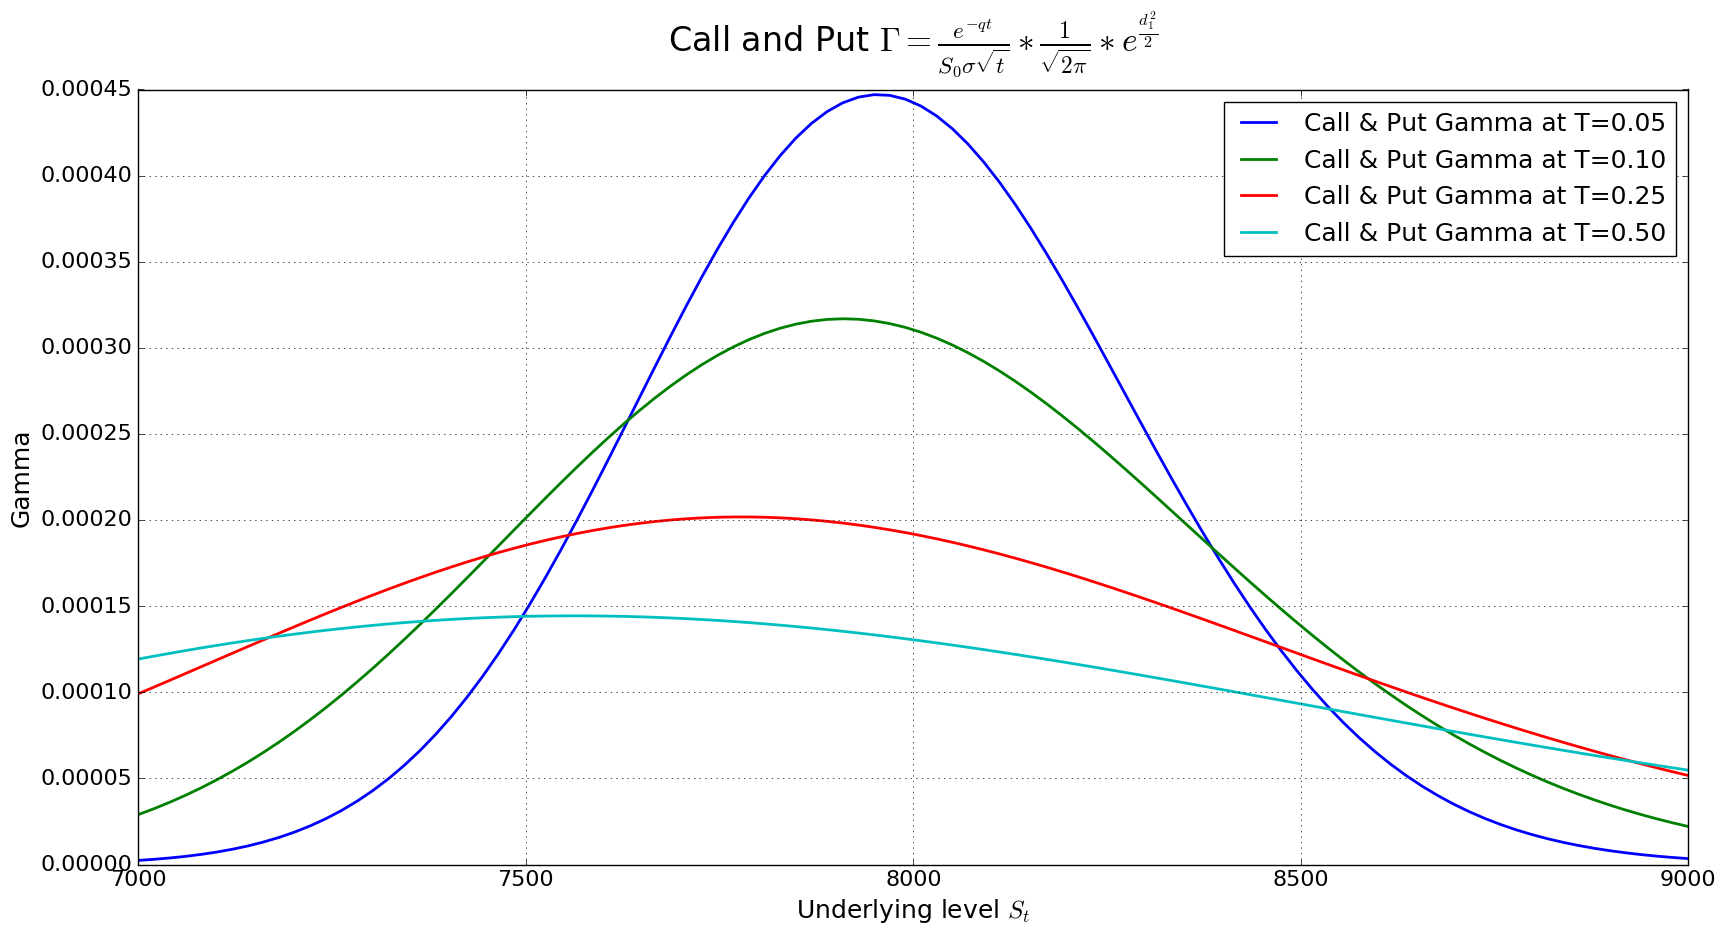

In [6]:
#Plots the mathematical Gamma function for different times to expiry.  Gamma is the same for call and put options.

import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from numpy import vectorize

plt.close()
S = np.linspace(7000, 9000, 100)
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion
#vectorise Gamma_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vGValue=vectorize(Gamma_value)

plt.figure(figsize=(20,10))
pvd=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvd.append(vGValue(S, 8000, Ts[i], r, .15))
    plt.plot(S, pvd[i], lw=2, label="Call & Put Gamma at T={exp:1.2f}".format(exp=Ts[i]))
plt.grid(True)
plt.title(r'Call and Put $\Gamma = \frac{e^{-qt}} {S_0 \sigma \sqrt{t}} \
                       * \frac{1}{\sqrt{2 \pi}} \
                     * e^\frac{d_1^2}{2}$', fontsize=24, y=1.04)
plt.xlabel('Underlying level $S_t$', fontsize=18)
plt.ylabel('Gamma', fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()


In [7]:
#Defines the pay off functions for both call and put options in order to use its gradient to derive Delta

from scipy import stats
import math

def BSM_Option_value(S, K, T, r, vol, pc='call'):
    d1 = (math.log(S/K) + (r+0.5*vol** 2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T) 

    if pc.lower()=='call':
        return( S*stats.norm.cdf( d1)- K*math.exp(-r*T)*stats.norm.cdf(d2))
    else:
        return(-S*stats.norm.cdf(-d1)+ K*math.exp(-r*T)*stats.norm.cdf(-d2)) 

#Defines constants that will be used in the pay off calculations
S0 = 7500.00 # initial index level
K  = 8000.00 # strike price
T = .25 # call option maturity
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion


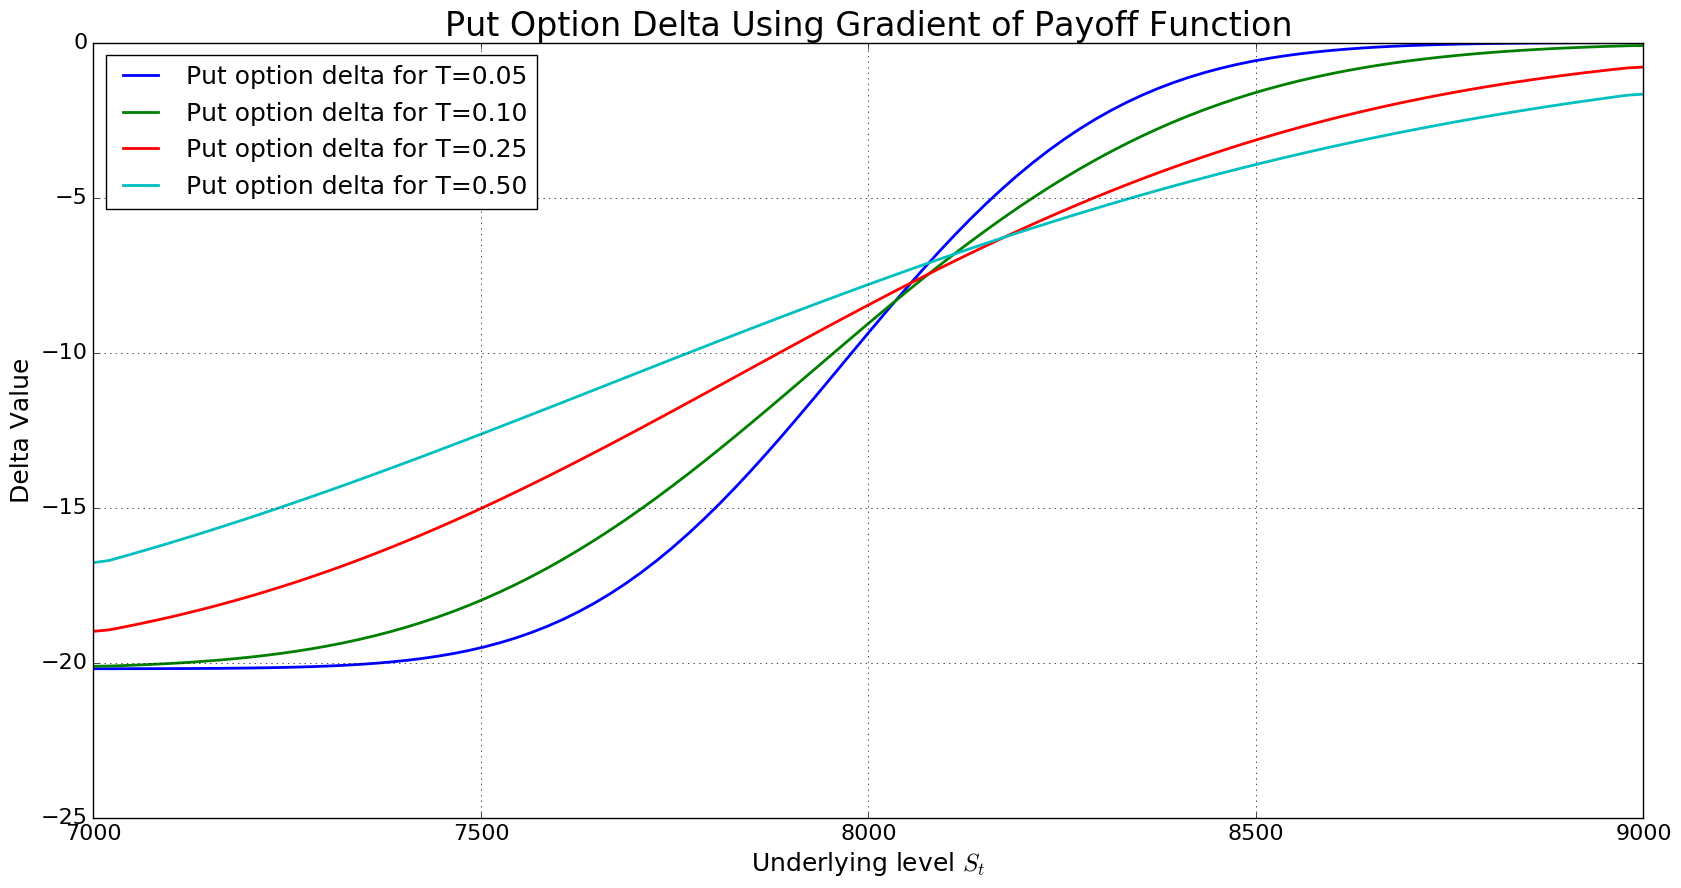

In [8]:
#Uses the gradient of the pay off function of a put option to derive Delta for different times to expiry

import numpy
#from numpy import vectorize
plt.close()
S = np.linspace(7000, 9000, 100)
#vectorise BSM_Option_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vBSValue=vectorize(BSM_Option_value)

plt.figure(figsize=(20,10))
plt.grid(True)
pvs=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvs.append(vBSValue(S, 8000, T, r, .15, pc="put"))
    grad = np.asarray(pvs[i])
    plt.plot(S, np.gradient(grad), lw=2, label="Put option delta for T={exp:1.2f}".format(exp=Ts[i]))

plt.title(r'Put Option Delta Using Gradient of Payoff Function', fontsize=24)
plt.xlabel('Underlying level $S_t$', fontsize=18)
plt.ylabel('Delta Value', fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()


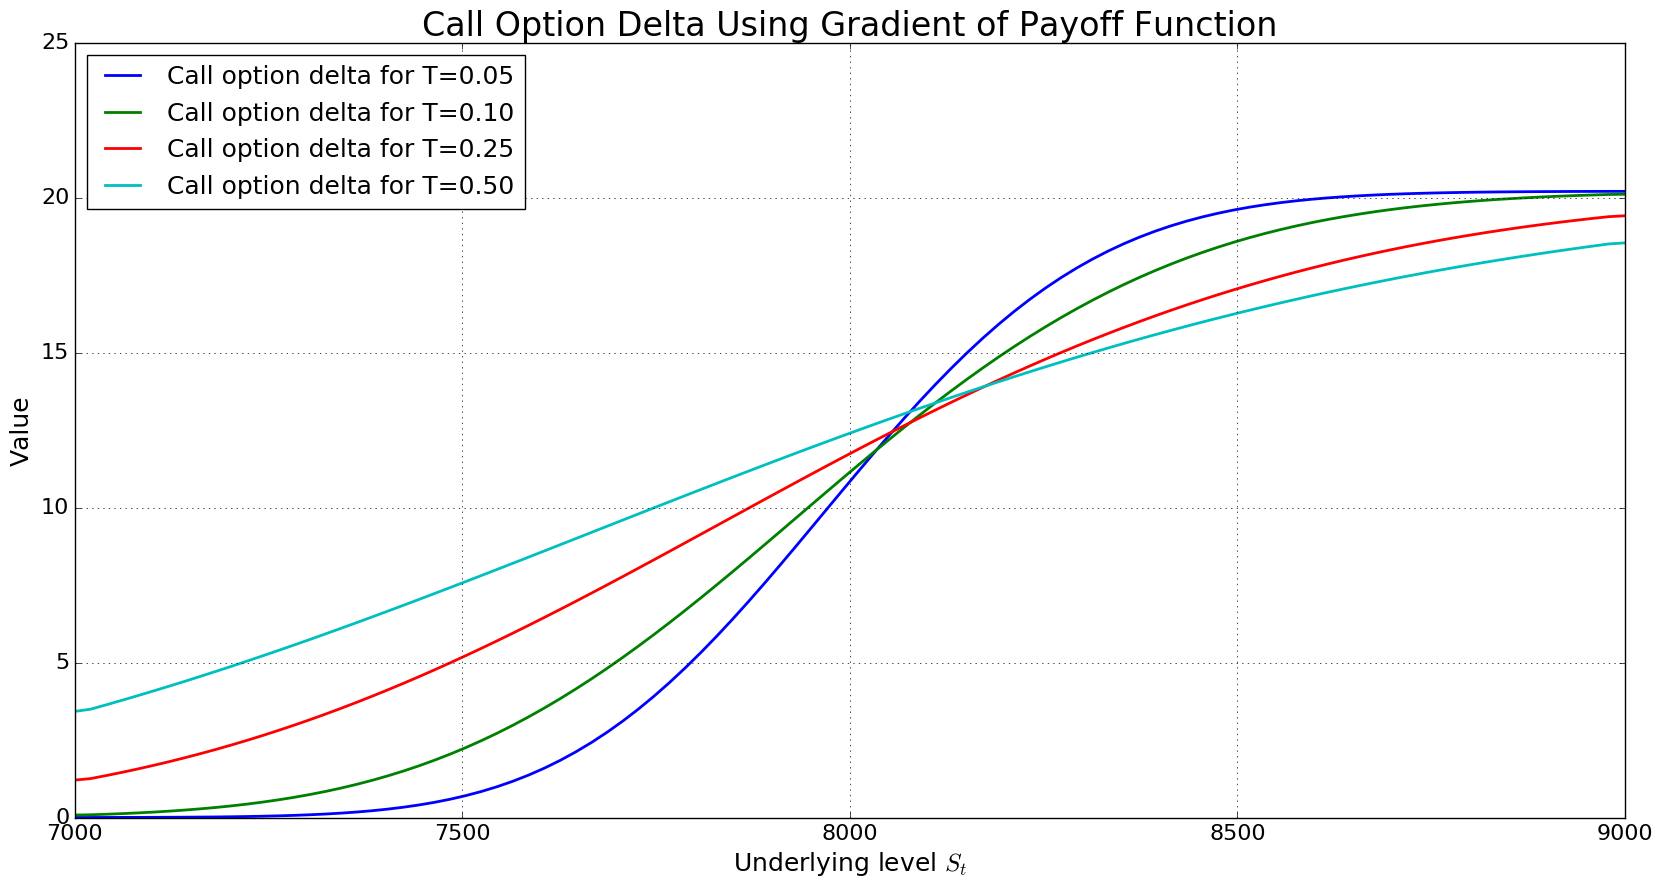

In [9]:
#Uses the gradient of the pay off function of a call option to derive Delta for different times to expiry

import numpy
#from numpy import vectorize
plt.close()
S = np.linspace(7000, 9000, 100)
#vectorise BSM_Option_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vBSValue=vectorize(BSM_Option_value)

plt.figure(figsize=(20,10))
plt.grid(True)
pvs=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvs.append(vBSValue(S, 8000, T, r, .15, pc="call"))
    grad = np.asarray(pvs[i])
    plt.plot(S, np.gradient(grad), lw=2, label="Call option delta for T={exp:1.2f}".format(exp=Ts[i]))
plt.title(r'Call Option Delta Using Gradient of Payoff Function', fontsize=24)
plt.xlabel('Underlying level $S_t$', fontsize=18)
plt.ylabel('Value' , fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()


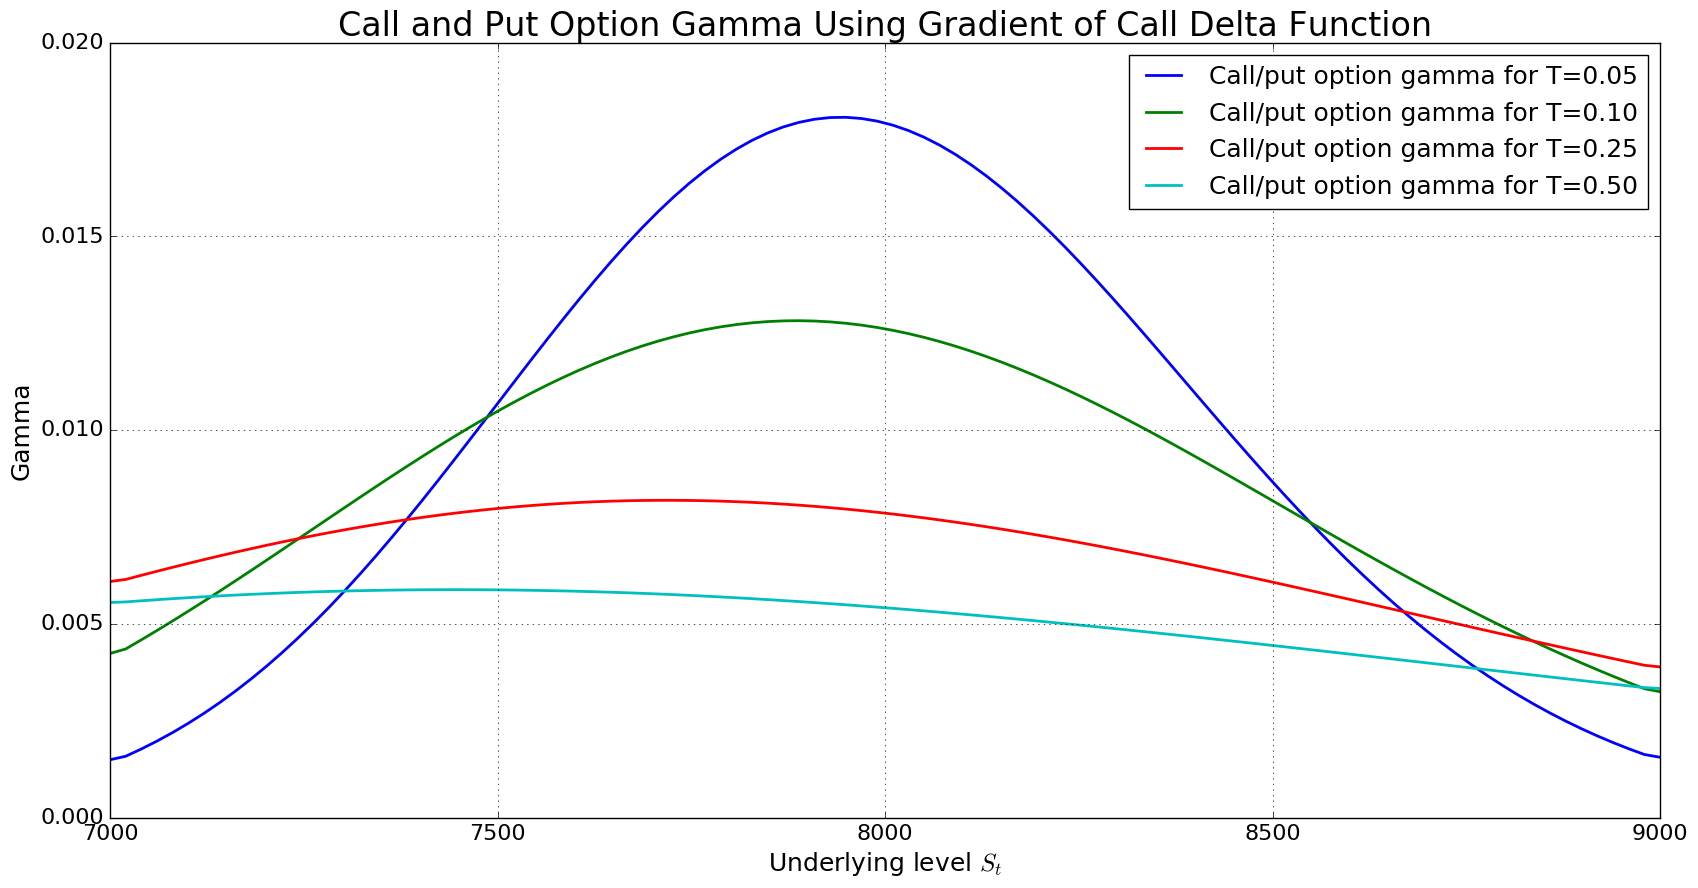

In [10]:
#Uses the gradient of the Delta function of a call option to derive Gamma for both put and call
#for different times to expiry

import numpy as np
import matplotlib.pyplot as plt
from numpy import vectorize

plt.close()
S = np.linspace(7000, 9000, 100)
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion
#vectorise Delta_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vDValue=vectorize(Delta_value)

plt.figure(figsize=(20,10))
plt.grid(True)
pvs=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvs.append(vDValue(S, 8000, T, r, .15, pc="put"))
    grad1 = np.asarray(pvs[i])
    plt.plot(S, np.gradient(grad1), lw=2, label="Call/put option gamma for T={exp:1.2f}".format(exp=Ts[i]))    
plt.title(r'Call and Put Option Gamma Using Gradient of Call Delta Function', fontsize=24)
plt.xlabel('Underlying level $S_t$', fontsize=18)
plt.ylabel('Gamma', fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='best', fontsize=18)
plt.show()